In [1]:
from create_data import DumbCirc as dc
from augsuq import AugmentedSUQ as auq
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data_instance = dc(0.5, 0.5, 0.25, 22)
fpc, fnc, pc, lp, tc, lt = data_instance.create_dataset(50, 2, [50], [0.2], True)

In [3]:
import torch
torch.manual_seed(22)
fpc, fnc, pc, lp, tc, lt = torch.tensor(fpc), torch.tensor(fnc), torch.tensor(pc), torch.tensor(lp), torch.tensor(tc), torch.tensor(lt)

In [4]:
model_zero = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp, mapping_dim=6, negative_cloud=fnc)

In [5]:
use_cuda = torch.cuda.is_available()
#device = torch.device("cuda" if use_cuda else "cpu")
device = "cpu"
model_zero.set_device(device)

In [6]:
model_zero.train(num_epochs=10, batch_size=20, learning_rate=0.0001)

C:\Users\Acer\Documents\All_of_RWTH\ThesisTarget\1MYWORK\thesis_notebooks\augsuq.py:182: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:3679.)
  + posterior_mean_pos.T @ torch.linalg.inv(posterior_var_pos) @ posterior_mean_pos


Epoch:0, Loss: 0.014047445682808756
Epoch:1, Loss: 0.0013719714037142693
Epoch:2, Loss: 0.004700696296524256
Epoch:3, Loss: 0.003711972425784916
Epoch:4, Loss: 9.318640106248562e-06
Epoch:5, Loss: 0.0028079054902540304
Epoch:6, Loss: 0.0010682924418197902
Epoch:7, Loss: 0.004724948380616493
Epoch:8, Loss: 8.213765455223482e-06
Epoch:9, Loss: -0.004182124540488831


In [7]:
model_zero.set_test_data(tc, lt)

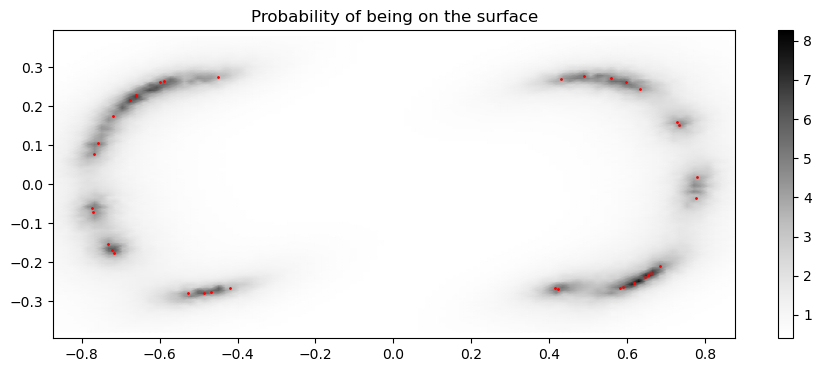

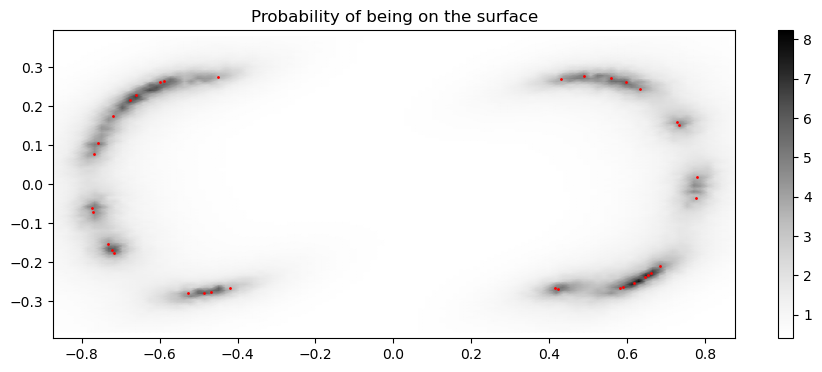

In [8]:
model_zero.predict()

In [9]:
model_zero.set_test_data(pc[2:4, :], lp[2:4, :])

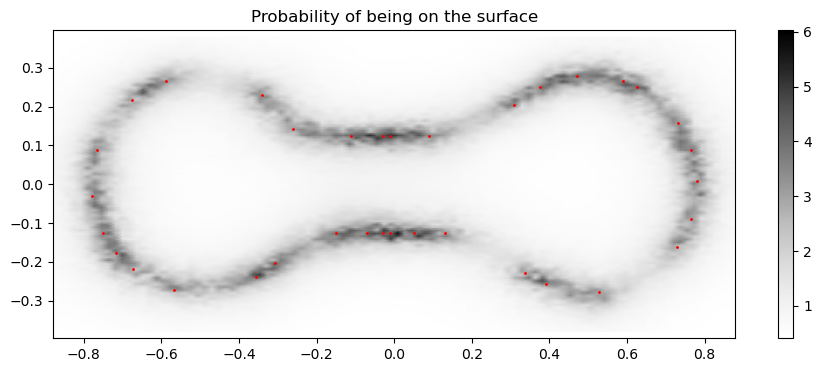

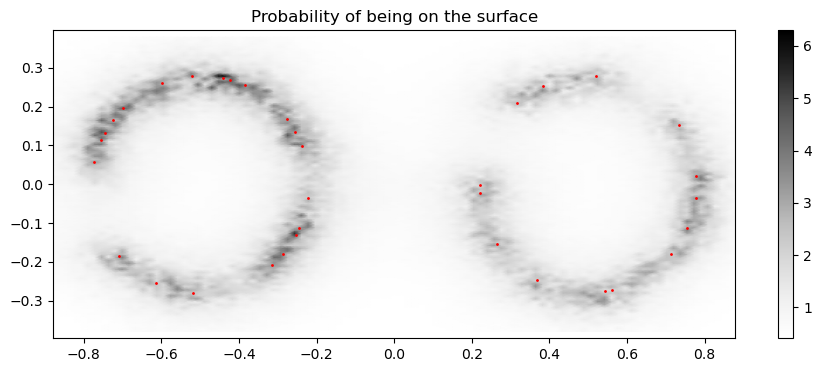

In [10]:
model_zero.predict()

In [11]:
model_bin = auq(point_cloud=fpc, partial_cloud=pc, test_partial=tc, train_labels=lp,  mapping_dim=6, negative_cloud=fnc)

In [12]:
device = "cpu"
model_bin.set_device(device)

In [13]:
model_bin.train(num_epochs=10, batch_size=20, learning_rate=0.0001, kind='b')

Epoch:0, Loss: 4.939551258087159
Epoch:1, Loss: 3.8975626277923583
Epoch:2, Loss: 3.834839130401611
Epoch:3, Loss: 3.4658208181381225
Epoch:4, Loss: 3.6661754665756225
Epoch:5, Loss: 3.73455726738739
Epoch:6, Loss: 3.9890570394912723
Epoch:7, Loss: 3.8113741825564573
Epoch:8, Loss: 4.138821410150207
Epoch:9, Loss: 4.278999337953503


In [14]:
model_bin.set_test_data(tc, lt)

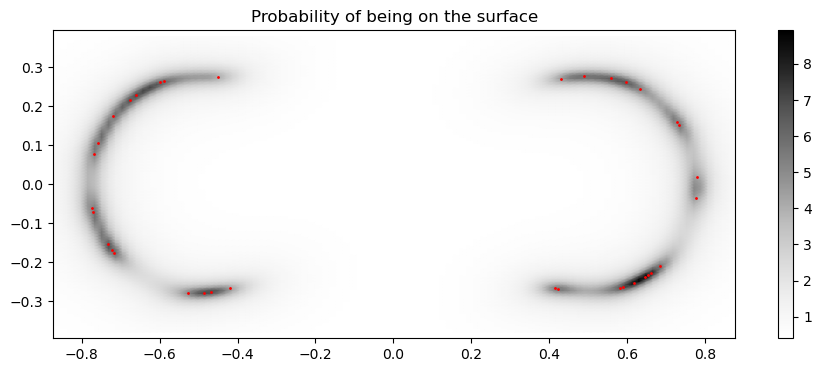

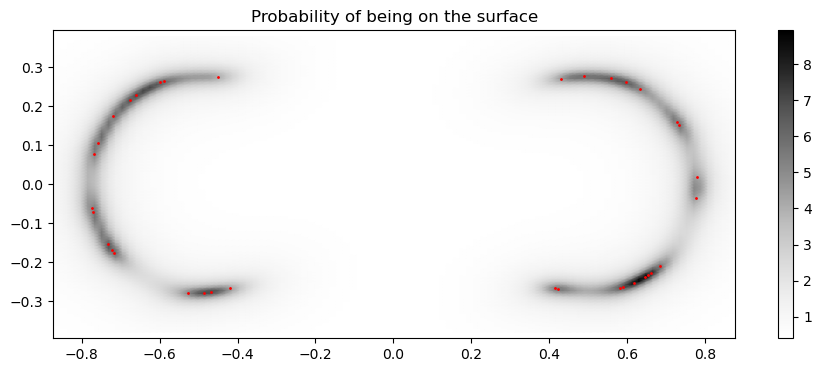

In [15]:
model_bin.predict()

In [16]:
model_bin.set_test_data(pc[2:4, :], lp[2:4, :])

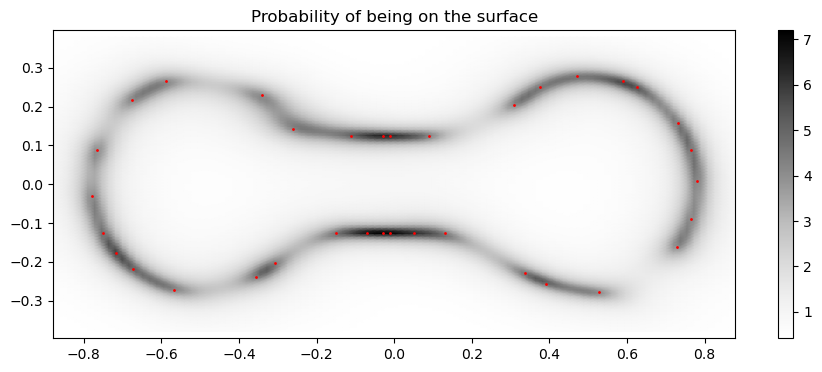

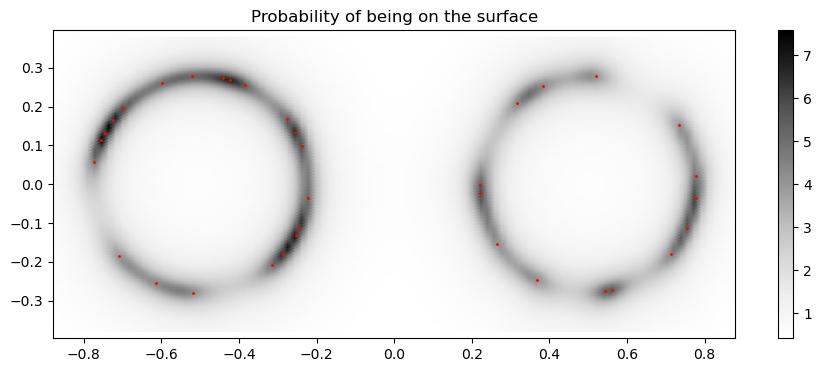

In [17]:
model_bin.predict()